<h1>Import Libraries<h1/>

In [101]:
import os
import cv2 as cv
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy






<h1>Features for dataset<h1/>

In [59]:
# Class Names and Class labels for the 2 classification
class_names = ['normal','covid']
# 0 = normal, 1 = Covid
class_labels = [0,1]

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1>Data Exploration<h1/>

In [60]:
# Initialize Count
normalCount=0
covidCount=0
imageCount=0

# Image size: 299 x 299 Pixels grayscale
image_size = (299, 299)

# Read image files - PNG
for class_name in class_names:
    for item in os.listdir(os.getcwd()+f'/drive/MyDrive/dataset_6/{class_name}/'):
        if item.endswith(".png"):

            # Check image size 299 x 299
            image_path = os.path.join(os.getcwd(), '/content/drive/MyDrive/dataset_6', class_name, item)
            # Raise Error if not correct size
            if Image.open(image_path).size != image_size:
                raise ValueError(f"The image size is not {image_size[0]} by {image_size[1]} pixels: {image_path}")

            # Increment Counter for images
            imageCount+=1
            if(class_name=='normal'):
                normalCount+=1
            else:
                covidCount+=1

print(f"Normal Count: {normalCount}\nCovid Count: {covidCount}\nTotal Count: {imageCount}\n")

Normal Count: 250
Covid Count: 180
Total Count: 430



<h1>Create Dataset for training Model<h1/>

In [61]:
# np array for images. 430 images, 299 pixel, 299 pixels
images = np.empty((imageCount,image_size[0],image_size[1]))
# np arraay for image labels, 430 labels
labels = np.empty((imageCount,1))

# Index for assigning image to np array loction
index=0

# Loop Through normal/covid img folders
for label,class_name in enumerate(class_names):
    # Iterate through items in folder
    for item in os.listdir(os.getcwd()+f'/drive/MyDrive/dataset_6/{class_name}/'):
        # if item is png image
        if item.endswith(".png"):
            image_path = os.getcwd()+f'/drive/MyDrive/dataset_6/{class_name}/{item}'
            # Read item into np array
            image = np.array(Image.open(image_path))
            # Normalize image from 0-255, to 0 to 1
            image = image/255 #???? Normalize?
            # Add image to np array
            images[index]=image
            # Add label to np array
            labels[index]=label
            index+=1
# Convert labels to INT
labels=np.array(labels,dtype=np.int32)

<h1>Visualize images from normal and covid folder<h1/>

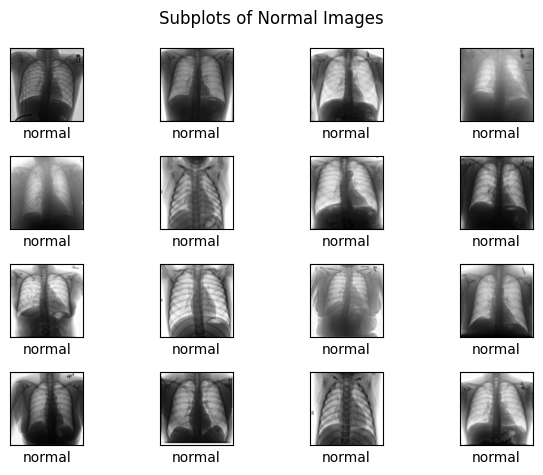

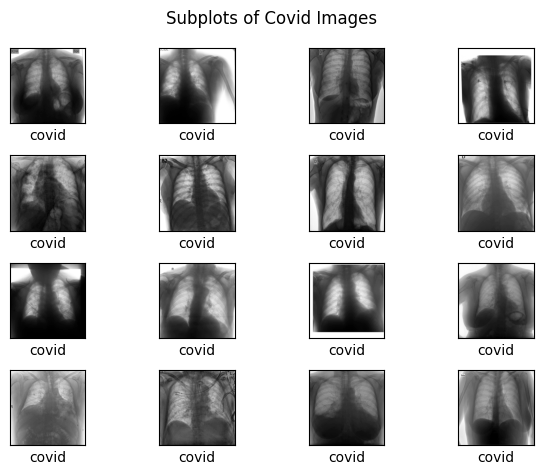

In [62]:
#Visualization for both normal and Covid
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[i][0]])
plt.subplots_adjust(top=0.9)
plt.suptitle("Subplots of Normal Images")
plt.tight_layout()
plt.show()


for i in range(normalCount,normalCount+16):
    plt.subplot(4,4,i-normalCount+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(labels[i][0])])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Subplots of Covid Images")
plt.show()

<h1>Splt dataset into training and testing dataset <h1/>

In [63]:
#Fixed seed
seed = 88
# Train Test Split for training machine learning and Deep Learning
# Split percentage 80% for train, 20% for test.
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=seed
)

[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]]


<h1>Visualize Training Dataset<h1/>

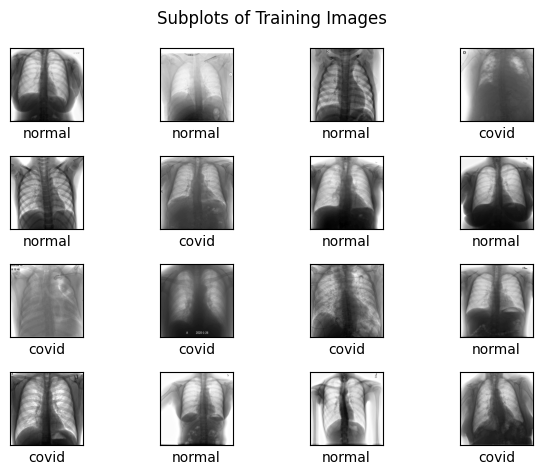

In [46]:
#Visualize new dataset of both covid and normal lungs
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.subplots_adjust(top=0.9)
plt.suptitle("Subplots of Training Images")
plt.tight_layout()
plt.show()

In [47]:
model = Sequential([
    Conv2D(32,(3,3),activation= 'relu', input_shape = (299,299,1)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation= 'relu', input_shape = (299,299,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(loss= 'binary_crossentropy' ,optimizer = 'adam',metrics= ['accuracy'])
model.fit(train_images,train_labels,epochs=7,batch_size=64)

Epoch 1/7
6/6 [==============================] - 40s 6s/step - loss: 1.3586 - accuracy: 0.5349
Epoch 2/7
6/6 [==============================] - 37s 6s/step - loss: 0.7112 - accuracy: 0.5058
Epoch 3/7
6/6 [==============================] - 40s 6s/step - loss: 0.6096 - accuracy: 0.6831
Epoch 4/7
6/6 [==============================] - 37s 6s/step - loss: 0.5494 - accuracy: 0.7471
Epoch 5/7
6/6 [==============================] - 37s 6s/step - loss: 0.4855 - accuracy: 0.7529
Epoch 6/7
6/6 [==============================] - 38s 6s/step - loss: 0.4091 - accuracy: 0.8430
Epoch 7/7
6/6 [==============================] - 36s 6s/step - loss: 0.3741 - accuracy: 0.8227


3/3 [==============================] - 3s 686ms/step
35
51


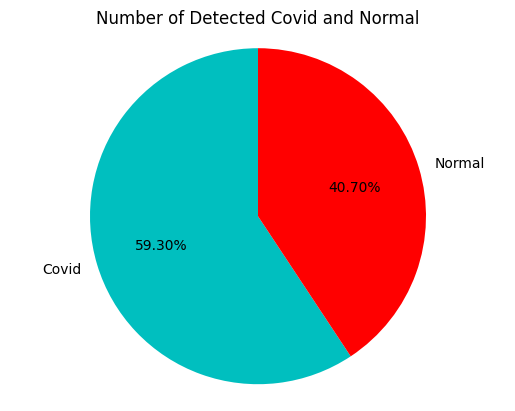

Total Number of Covid : 51
Total Number of Normal : 35


In [117]:
cnnPrediction = model.predict(test_images)

threshold = 0.5
binary_predictions = []
totalNumberOfCovid = 0
totalNumberOfNormal = 0

for prediction in cnnPrediction:

    predicted_probability = prediction[0]

    binary_prediction = 1 if predicted_probability >= threshold else 0

    binary_predictions.append(binary_prediction)

for item in binary_predictions:
   if item == 1:
     totalNumberOfCovid += 1
   elif item == 0:
     totalNumberOfNormal += 1

print(totalNumberOfNormal)
print(totalNumberOfCovid)

labels = 'Covid', 'Normal',
sections = [totalNumberOfCovid,totalNumberOfNormal]
colors = ['c', 'r',]

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        autopct = '%1.2f%%')

plt.axis('equal')
plt.title('Number of Detected Covid and Normal')
plt.show()

print('Total Number of Covid : ' + str(totalNumberOfCovid))
print('Total Number of Normal : ' + str(totalNumberOfNormal))




              precision    recall  f1-score   support

       Covid       0.94      0.66      0.78        50
      Normal       0.67      0.94      0.78        36

    accuracy                           0.78        86
   macro avg       0.80      0.80      0.78        86
weighted avg       0.83      0.78      0.78        86



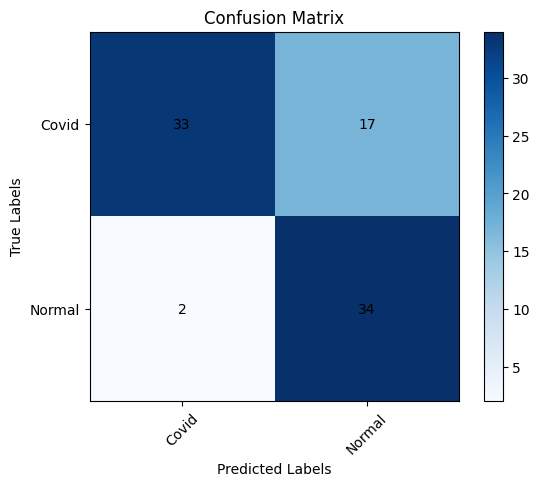

In [127]:
predicted =np.array(binary_predictions)
actual = np.array([item[0] for item in test_labels])
label_encoder = LabelEncoder()
label_encoder.fit_transform(['Normal','Covid'])
target_names = ['Covid', 'Normal']

print(classification_report(actual,predicted,target_names=target_names))
conf_matrix = confusion_matrix(actual, predicted)
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
class_names = label_encoder.classes_
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.colorbar()

for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center')